# Лабораторная работа № 2
## Студент: Спиридонов К.А. М8О-107М-23

### Задачи:
Глобальная оптимизация и метаэврестические алгоритмы
   - В `pygmo` запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения

In [2]:
!pip install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 25.6 MB/s eta 0:00:00


In [65]:
import pygmo as pg
import numpy as np

from matplotlib import pyplot as plt
from numpy import linalg as la
import matplotlib.animation as animation
from IPython.display import HTML
import autograd
import math
import random

In [4]:
def draw_fun(function_info: callable, title: str) -> None:

    fun = function_info.fitness
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection = '3d')

    domain = np.array(list(function_info.get_bounds()))

    x = np.linspace(domain[0, 0], domain[1, 0], 100)
    y = np.linspace(domain[0, 1], domain[1, 1], 100)

    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = fun(np.array([x_grid, y_grid]))[0]

    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'plasma', alpha=0.5)

    ax.set_title(title, fontsize = 12, fontweight="bold",loc="left")
    ax.legend(loc="upper left")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

In [5]:
class sphere_function:
    def __init__(self, dim):
        self.dim = dim

    def fitness(self, x):
        return [sum(x*x)]

    def get_bounds(self):
        return ([-1] * self.dim, [1] * self.dim)

    def get_name(self):
        return "Sphere Function"

    def get_extra_info(self):
        return "\tDimensions: " + str(self.dim)

In [6]:
shpere_fun = sphere_function(2)

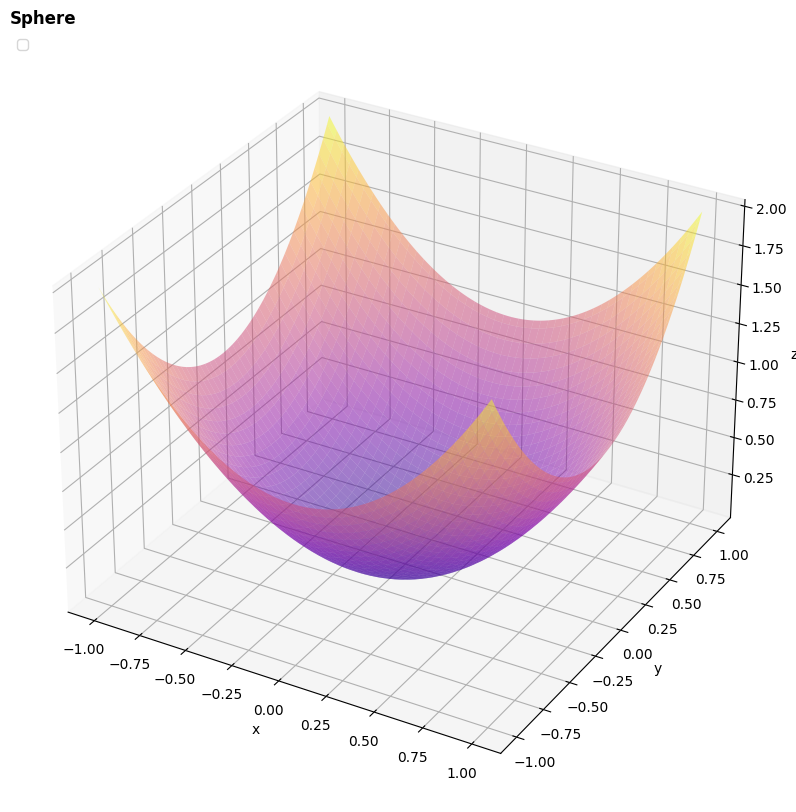

In [7]:
draw_fun(shpere_fun, "Sphere")

In [8]:
class booth_function:
    def __init__(self):
        self.dim = 2

    def fitness(self, x):
        return [(x[0] + 2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2]

    def get_bounds(self):
        return ([-10, -10], [10, 10])

    def get_name(self):
        return "Booth Function"

    def get_extra_info(self):
        return "\tDimensions: " + str(self.dim)

In [9]:
booth_fun = booth_function()

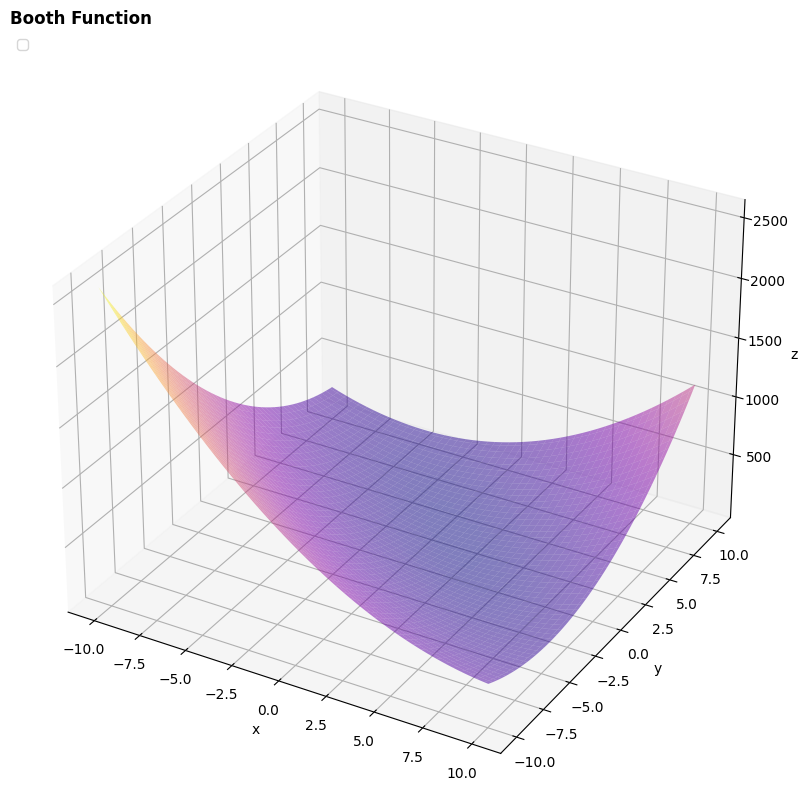

In [10]:
draw_fun(booth_fun, "Booth Function")

In [77]:
algorithms = [pg.bee_colony(gen = 1000, limit = 1000, seed = 10), pg.gwo(gen = 1000, seed = 10), pg.sea(gen = 1000, seed = 10)]
for algo in algorithms:
    print(pg.algorithm(algo))

Algorithm name: ABC: Artificial Bee Colony [stochastic]
	C++ class name: pagmo::bee_colony

	Thread safety: basic

Extra info:
	Maximum number of generations: 1000
	Limit: 1000
	Verbosity: 0
	Seed: 10
Algorithm name: GWO: Grey Wolf Optimizer [stochastic]
	C++ class name: pagmo::gwo

	Thread safety: basic

Extra info:
	Generations: 1000
	Verbosity: 0
	Seed: 10
Algorithm name: SEA: (N+1)-EA Simple Evolutionary Algorithm [stochastic]
	C++ class name: pagmo::sea

	Thread safety: basic

Extra info:
	Generations: 1000
	Verbosity: 0
	Seed: 10


In [76]:
def examine_function(function_info: callable, algorithms) -> None:
    colors_ = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
    colors = colors_(len(algorithms))

    fig = plt.figure(figsize = (10, 10))

    for i in range(len(algorithms)):
        print('='*80)
        # The algorithm
        algo = pg.algorithm(algorithms[i])
        algo.set_verbosity(100)
        print(algo)
        # The problem
        prob = pg.problem(function_info)
        # The initial population
        pop = pg.population(prob, size = 10)
        print(pop)
        # The actual optimization process
        pop = algo.evolve(pop)
        uda = algo.extract(type(algorithms[i]))
        log = uda.get_log()
        plt.semilogy([entry[0] for entry in log],[entry[2]for entry in log], 'k--', label=algo.get_name(), c = colors[i])
        print(pop)
        print('='*80)

    plt.legend(loc="upper left")


Algorithm name: ABC: Artificial Bee Colony [stochastic]
	C++ class name: pagmo::bee_colony

	Thread safety: basic

Extra info:
	Maximum number of generations: 1000
	Limit: 1000
	Verbosity: 100
	Seed: 10
Problem name: Multidimensional Rosenbrock Function
	C++ class name: pagmo::rosenbrock

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-5, -5]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: true
	User implemented gradient sparsity: false
	Expected gradients: 2
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 10
	Gradient evaluations: 0

	Thread safety: constant

Population size: 10

List of individuals: 
#0:
	ID:			13564664918732128701
	Decision vector:	[8.38651, 1.76159]
	Fitness vector:		[470267]
#1:
	ID:			10004267866305514873
	Decision vector:	[-3.87851, 4.93496]
	Fitness vector:

<ipython-input-76-4ab301af38e4>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.semilogy([entry[0] for entry in log],[entry[2]for entry in log], 'k--', label=algo.get_name(), c = colors[i])


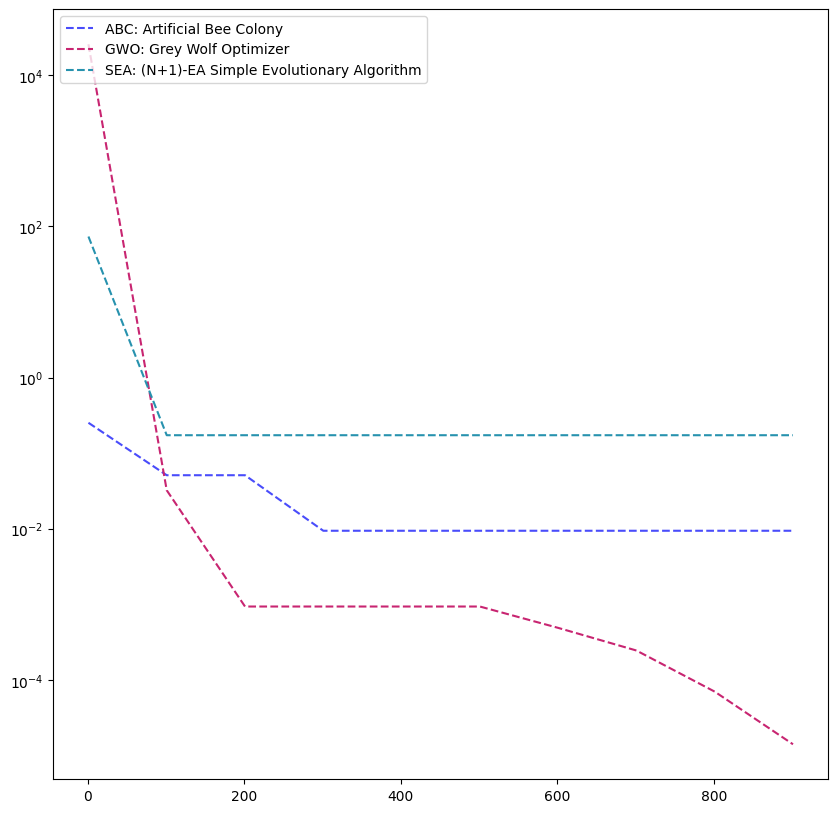

In [78]:
examine_function(pg.rosenbrock(2), algorithms)

Algorithm name: ABC: Artificial Bee Colony [stochastic]
	C++ class name: pagmo::bee_colony

	Thread safety: basic

Extra info:
	Maximum number of generations: 1000
	Limit: 1000
	Verbosity: 100
	Seed: 10
Problem name: Booth Function
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 10

	Thread safety: none

Extra info:
	Dimensions: 2
Population size: 10

List of individuals: 
#0:
	ID:			14386835238590364411
	Decision vector:	[-1.06246, 6.72432]
	Fitness vector:		[29.1713]
#1:
	ID:			5530509476767597057
	Decision vector:	[-2.33801, -1.73071]
	Fitness vector:		[293.939]
#2:
	ID:			11573224197304136733

<ipython-input-73-4ab301af38e4>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.semilogy([entry[0] for entry in log],[entry[2]for entry in log], 'k--', label=algo.get_name(), c = colors[i])


Problem name: Booth Function
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 20010

	Thread safety: none

Extra info:
	Dimensions: 2
Population size: 10

List of individuals: 
#0:
	ID:			14386835238590364411
	Decision vector:	[1, 3]
	Fitness vector:		[1.02552e-29]
#1:
	ID:			5530509476767597057
	Decision vector:	[1, 3]
	Fitness vector:		[7.88861e-31]
#2:
	ID:			11573224197304136733
	Decision vector:	[1, 3]
	Fitness vector:		[6.31089e-30]
#3:
	ID:			9209275704457747342
	Decision vector:	[1, 3]
	Fitness vector:		[7.88861e-31]
#4:
	ID:			5450476580652630752
	Decision vector:	[1, 3]
	Fitness vector:	

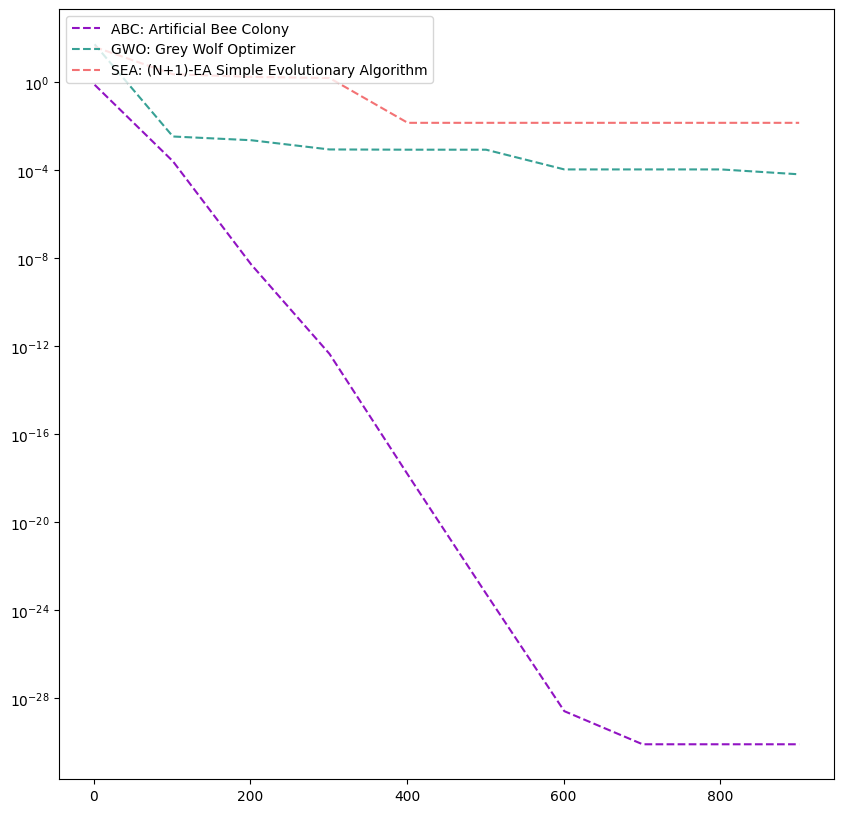

In [75]:
examine_function(booth_function(), algorithms)